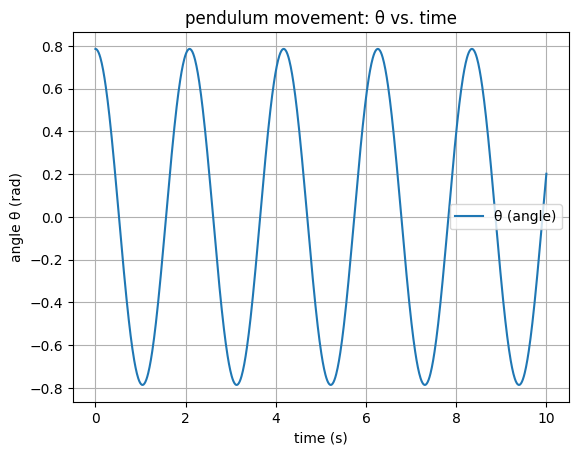

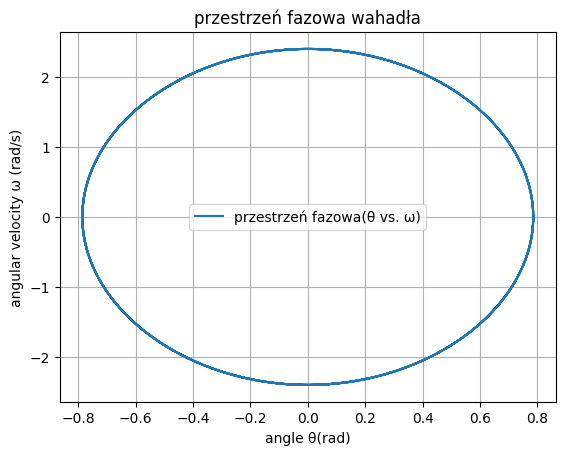

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja układu równań dla wahadła
def pendulum(state, t, params):
    theta, omega = state  # Rozpakowanie zmiennych stanu: theta i omega
    g_over_l = params  #stała g/l (przyspieszenie ziemskie / długość wahadła)
    dtheta_dt = omega
    domega_dt = -np.sin(theta) * g_over_l  # d(omega)/dt = -sin(theta) * g/l
    return np.array([dtheta_dt, domega_dt])

# Solver ODE (Runge-Kutta 4. rzędu)
def solve_ode_system(func, initial_state, t_start, t_finish, steps, params):
    dt = (t_finish - t_start) / steps
    data = [initial_state]
    t = t_start

    for _ in range(steps):
        current_state = data[-1]
        k1 = dt * func(current_state, t, params)
        k2 = dt * func(current_state + 0.5 * k1, t + 0.5 * dt, params)
        k3 = dt * func(current_state + 0.5 * k2, t + 0.5 * dt, params)
        k4 = dt * func(current_state + k3, t + dt, params)
        next_state = current_state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        data.append(next_state)
        t += dt

    return np.array(data)

# Parametry symulacji
g_over_l = 9.8 / 1.0  # Przyspieszenie ziemskie g = 9.8 m/s^2, długość l = 1 m
initial_state = [np.pi / 4, 0.0]  # Początkowy kąt 45° (pi/4 rad), prędkość kątowa = 0
t_start = 0
t_finish = 10  # time 10 sec
steps = 1000

time = np.linspace(t_start, t_finish, steps + 1)
solution = solve_ode_system(pendulum, initial_state, t_start, t_finish, steps, g_over_l)



theta = solution[:, 0]
omega = solution[:, 1]

#plots
plt.figure()
plt.plot(time, theta, label="θ (angle)")
plt.xlabel("time (s)")
plt.ylabel("angle θ (rad)")
plt.title("pendulum movement: θ vs. time")
plt.legend()
plt.grid()

plt.figure()
plt.plot(theta, omega, label="przestrzeń fazowa(θ vs. ω)")
plt.xlabel("angle θ(rad)")
plt.ylabel("angular velocity ω (rad/s)")
plt.title("przestrzeń fazowa wahadła")
plt.legend()
plt.grid()

plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#stałe
g=9.8
l1=l2= 1.0
m1=m2= 1.0

#the motion of double pendulum
def double_pendulum(t, y):
    theta1,omega1,theta2,omega2=y

    delta_theta=theta1-theta2
    mian= 1+np.sin(delta_theta)**2 #mianownik, denominator

    dtheta1_dt= omega1
    dtheta2_dt= omega2
    domega1_dt=(-g*(2* np.sin(theta1)-np.cos(delta_theta) * np.sin(theta2))+np.cos(delta_theta) * np.sin(delta_theta) * (omega1**2 + omega2**2))/mian
    domega2_dt=(2*g*(np.cos(delta_theta) * np.sin(theta1)-np.sin(theta2))+np.sin(delta_theta) * np.cos(delta_theta) * (omega1**2 + omega2**2))/mian

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]


def solve_double_pendulum(theta1_0, theta2_0, omega1_0=0, omega2_0=0, t_max=10, dt=0.01):
    t_eval = np.arange(0, t_max, dt)
    y0 = [theta1_0, omega1_0, theta2_0, omega2_0]
    sol = solve_ivp(double_pendulum, [0, t_max], y0, t_eval=t_eval)
    return sol.t, sol.y




result: 22.73


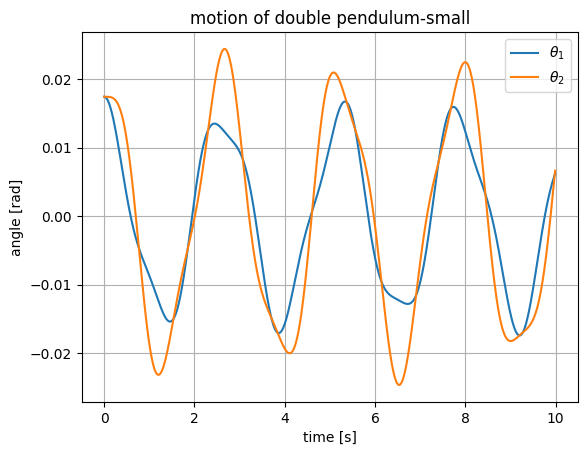

In [25]:
#2.2 small
angles= np.linspace(0,np.pi/2,100)
errors= np.abs(np.sin(angles)-angles)
approximation_limit= angles[np.argmax(errors > 0.01)]*180/np.pi

print(f"result: {approximation_limit:.2f}")

#2.3 small
theta1_0_small=np.radians(1)
theta2_0_small=np.radians(1) #angle
t,y_small=solve_double_pendulum(theta1_0_small, theta2_0_small)

#plot
plt.figure()
plt.plot(t, y_small[0],label=r'$\theta_1$')
plt.plot(t, y_small[2],label=r'$\theta_2$')
plt.title("motion of double pendulum-small")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid()
plt.show()




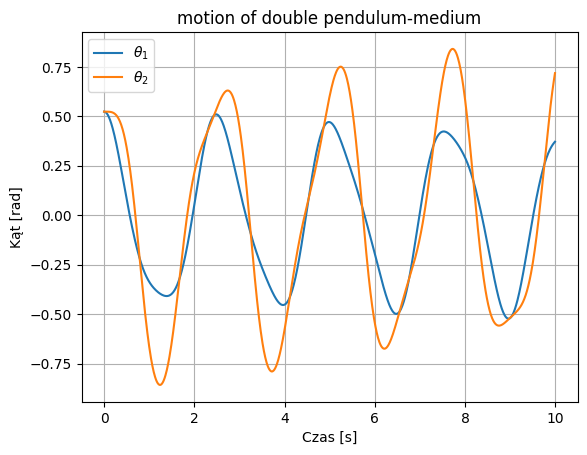

In [27]:
#2.4 medium
theta1_0_medium = np.radians(30)
theta2_0_medium = np.radians(30)
t, y_medium = solve_double_pendulum(theta1_0_medium, theta2_0_medium)



plt.figure()
plt.plot(t, y_medium[0], label=r'$\theta_1$')
plt.plot(t, y_medium[2], label=r'$\theta_2$')
plt.title("motion of double pendulum-medium")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid()
plt.show()



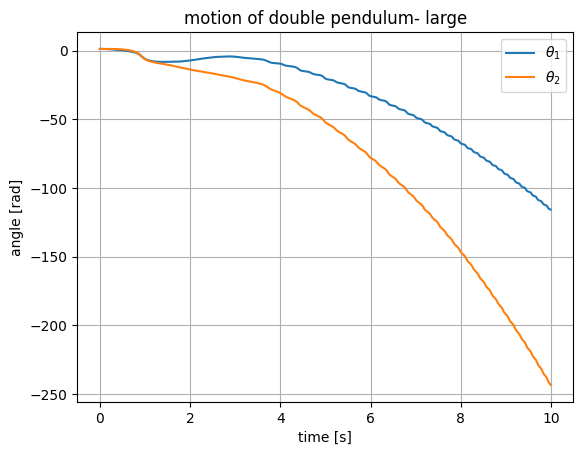

In [38]:
# 2.5 large
theta1_0_large = np.radians(70)
theta2_0_large = np.radians(70)
t, y_large = solve_double_pendulum(theta1_0_large, theta2_0_large)


plt.figure()
plt.plot(t, y_large[0], label=r'$\theta_1$')
plt.plot(t, y_large[2], label=r'$\theta_2$')
plt.title("motion of double pendulum- large")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid()
plt.show()



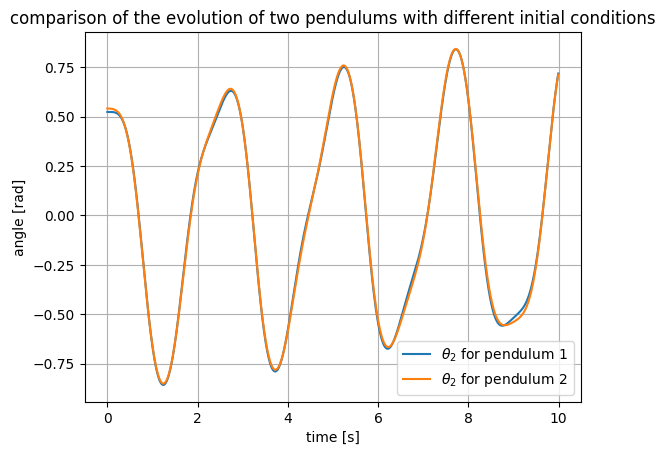

In [51]:
#2.6
theta1_0_diff = np.radians(30)
theta2_0_diff_1 = np.radians(30)
theta2_0_diff_2 = np.radians(31)

t, y_diff_1 = solve_double_pendulum(theta1_0_diff, theta2_0_diff_1)
t, y_diff_2 = solve_double_pendulum(theta1_0_diff, theta2_0_diff_2)

#plot
plt.figure()
plt.plot(t, y_diff_1[2], label=r'$\theta_2$ for pendulum 1')
plt.plot(t, y_diff_2[2], label=r'$\theta_2$ for pendulum 2')
plt.title("comparison of the evolution of two pendulums with different initial conditions")
plt.xlabel("time [s]")
plt.ylabel("angle [rad]")
plt.legend()
plt.grid()
plt.show()